# Exam

- name= Luca
- surname= Menti
- id= 2063594
- email= luca.menti@studenti.unipd.it

## 1. Numpy basics

### Outer product

Find the outer product of the following two vectors
```
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

- Using the function outer in numpy
- Using a nested for loop or list comprehension
- Using numpy broadcasting operatoins

In [1]:
import numpy as np
import matplotlib.pylab as plt
import scipy.fftpack as fftpack
#create the arrays
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

#using fuction outer point 1
print('the outer product  using function outer is:\n',np.outer(u,v,None))

print('\n')

#using loop point 2
prod=[]
for i in u:
    for j in v:
        prod.append(i*j)
prod=np.array(prod)
prod=prod.reshape(len(u),len(v))

print('the outer product  using loop is:\n',prod)
print('\n')

#using broadcast point 3
print('the outer product  using broadcasting operations is:\n',u[...,None]*v[None,:])

the outer product  using function outer is:
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


the outer product  using loop is:
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


the outer product  using broadcasting operations is:
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


## 2. Visualization

### Profile plot

Produce a profile plot from a scatter plot.

Download the following dataset:

```wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy```

and load it as a pandas dataframe.

Note that you should use the ```np.load()``` function to load the file as a numpy array, call the ```.item()``` method, and then pass it to the ```pd.DataFrame()``` constructor.

- Inspect the dataset, you'll find two variables (features).
- Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
- Perform a linear regression of "residuals" versus "distances" using ```scipy.stats.linregress()```.
- Plot a seaborn jointplot of "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot.
- Fill 3 numpy arrays:
 - ```x```, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins).
 - ```y```, the mean values of the "residuals", estimated in slices (bins) of "distance".
 - ```erry```, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance".

- Plot the profile plot on top of the scatter plot.

In [2]:
import pandas as pd
import seaborn as sns
from scipy import stats

#download the file
!wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy -nv -P "./data/"

#loadfile in panda
data=pd.DataFrame(np.load(("./data/residuals_261.npy"),allow_pickle=True).item())

2023-01-30 18:30:55 URL:https://uca09b58c7adb1f089eeb57ee844.dl.dropboxusercontent.com/cd/0/inline2/B1gtasR063lRASjBUcFkEY0jDMdIHbmwwMnoZT4wOJa5IrpzNeHohLyI6bTapxA0lYdvoHR63-6dY8v9ku4DHy7nbHHN_cSkWQBlgnzYcg8TOMQSuFJsRqtqkd5O-ujMZ0-7qZQrb7JFObvK6PJ9YG2dRW81CGL1XkLyNgLqHGmd18xpN5fASkCrCFb_rPPkkXhUdUhyWJlNnhni06TXmg4cUaqiyQmdmTVmil8Kw76MtKmU3vICsLKrerYabP7jCpsk1T076tqktqFY6c8ZG_rXBnV_sBpUttT3ZRpaz5fAvGMQ7aDRFvMuvyjSrnnoKSSMGvg_JCFWjPGLlgitavGAHAlt91crceDCUtpugqbxz4bGt5zIrIVJna5g9Zz2HN-P5lEBIh3gJQ-7XOglpk2chylTfD8xXNjaTK127doy-A/file [252081/252081] -> "./data/residuals_261.npy.34" [1]


In [3]:
#inspect the dataset
print('The dataset is:\n')
data

The dataset is:



,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


In [4]:
#Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
data=data[abs(data["residuals"])<2]
print('The cleaned dataset is:\n')
data

The cleaned dataset is:



,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


the results from the linear regression are:

slope=  0.0032597701220305852 

intercept=  -0.15432816763069473 

rvalue=  0.04340351052255912 

pvalue=  8.717037183576317e-06 

stderr=  0.000732701400844579 



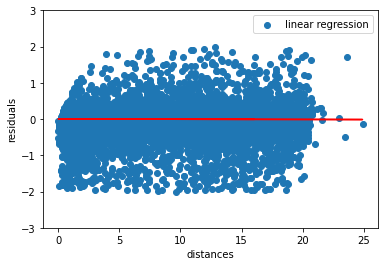

In [5]:
#Perform a linear regression of "residuals" versus "distances" using scipy.stats.linregress().
slope, intercept, r, p, se = stats.linregress(data["distances"], data["residuals"])
print("the results from the linear regression are:\n")
print('slope= ', slope,'\n')
print('intercept= ', intercept,'\n')
print('rvalue= ', r,'\n')
print('pvalue= ', p,'\n')
print('stderr= ', se,'\n')

plt.scatter(data["distances"],data["residuals"])
plt.plot(data["distances"],slope*data["distances"]*intercept,color="red")
plt.xlabel('distances')
plt.ylabel('residuals')
plt.legend(['linear regression'])
plt.ylim(-3,3)
plt.show()

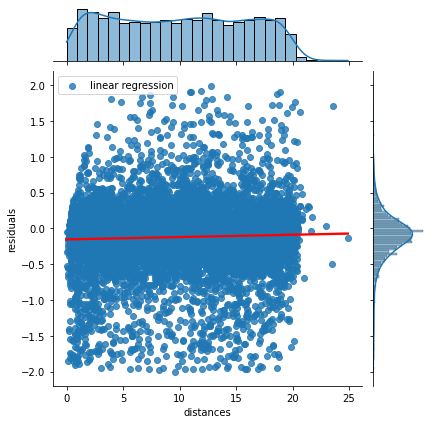

In [6]:
#Plot a seaborn jointplot of "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot.
sns.jointplot(data=data, x="distances", y="residuals", kind="reg",joint_kws={'line_kws':{'color':'red'}})
plt.legend(['linear regression'])
plt.show()

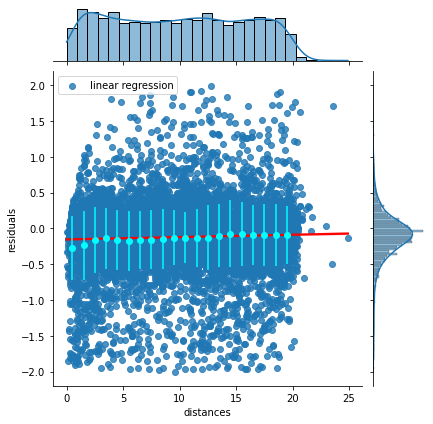

In [7]:
#Fill 3 numpy arrays:
step=0.5
x=[i+0.5 for i in range(20)]
y=[np.mean([data[data['distances'].between(step*i-step,step*i+step)]['residuals']]) for i in range(20)]
err=[np.std([data[data['distances'].between(step*i-step,step*i+step)]['residuals']]) for i in range(20)]

#Plot the profile plot on top of the scatter plot.
sns.jointplot(data=data, x="distances", y="residuals", kind="reg",joint_kws={'line_kws':{'color':'red'}})
plt.errorbar(x,y,err,color='cyan',fmt='o')
plt.legend(['linear regression'])
plt.show()

## 3. Algorithms

### FFT of an image

Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
- Load the image using `pylab.imread()`.
- Find and use the 2-D FFT function in `scipy.fftpack`, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
- The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
- Apply the inverse Fourier transform to see the resulting image.

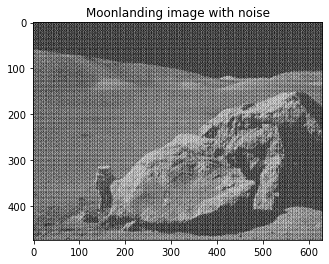

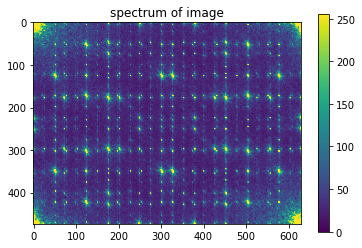

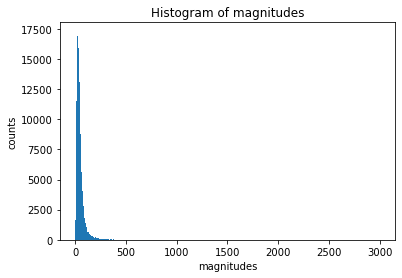

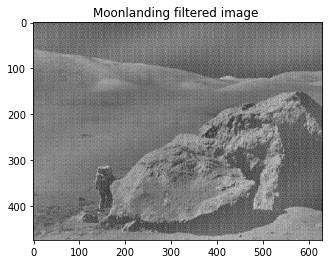

In [8]:
import matplotlib.pylab as plt
import scipy.fftpack as fftpack

#Load the image using pylab.imread().
image=plt.imread("moonlanding.png")
plt.imshow(image,cmap='gray')
plt.title('Moonlanding image with noise')
plt.show()

#Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image
image_fft=fftpack.fft2(image)
plt.imshow(abs(image_fft),vmin=0,vmax=255)
plt.title('spectrum of image')
plt.colorbar()
plt.show()


#hist of magnitudes
magnitudes=np.reshape(np.abs(image_fft),np.prod(image_fft.shape))
plt.hist(magnitudes,bins=1000,range=[0,3000])
plt.title('Histogram of magnitudes')
plt.xlabel("magnitudes")
plt.ylabel('counts')
plt.show()

# set some of those components to zero (use array slicing).
image_fft[np.abs(image_fft)>3000]=0

#Apply the inverse Fourier transform to see the resulting image.
image_fft=fftpack.ifft2(image_fft).real
plt.imshow(image_fft,cmap="gray")
plt.title('Moonlanding filtered image ')
plt.show()

## 4. Monte Carlo

### Monte Carlo integration in high dimension

- Start of by computing the area of a circle of unit radius, by integrating the function
 $$ f(x,y) = \begin{cases}
                        1 \,\,\,\,\text{if $x^2+y^2\le 1$} \\
                        0 \,\,\,\,\text{elsewhere}
                    \end{cases}
 $$
- Generalize the result for a 10D sphere

In [9]:
import numpy as np


#function
def f(x):
    r_sq=np.sum(x**2,axis=0)
    return [1 if(r<=1) else 0 for r in r_sq]

#area 
N=10**6
x=np.random.uniform(0,1,(2,N))
I=2**2/N * np.sum(f(x))
print("The area is:",I)

#genealization of 10d sphere
x=np.random.uniform(0,1,(10,N))
I=2**10/N * np.sum(f(x))
print("The result for a 10D sphere is:",I)

The area is: 3.141028
The result for a 10D sphere is: 2.535424
